# Libraries

! pip install numpy pandas sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

# Import data

## X

In [2]:
# For training the model
X_train = pd.read_csv("../X/X_train.csv" , index_col=[0], header=[0,1, 2])

# For cross validation
X_valid = pd.read_csv("../X/X_valid.csv", index_col=[0], header=[0, 1, 2])

# For prediction
X_test = pd.read_csv("../X/X_test.csv", index_col=[0], header=[0, 1, 2])

## Task 1

In [3]:
y_train_t1 = pd.read_csv("../Task1/Y_train.csv")
y_valid_t1 = pd.read_csv("../Task1/Y_valid.csv")

In [4]:
y_train_t1_value=y_train_t1["mort_icu"]
y_valid_t1_value=y_valid_t1["mort_icu"]

## Task 2

In [5]:
y_train_t2 = pd.read_csv("../Task2/Y_train.csv")
y_valid_t2 = pd.read_csv("../Task2/Y_valid.csv")

In [6]:
y_train_t2_value=y_train_t2["los_icu"]
y_valid_t2_value=y_valid_t2["los_icu"]

# Data Pre-processing

## Process 1: Mean


In [7]:
li=[] # Find the positions of the columns with means of the particular feature after 24 hours
for i in range(47, 7488, 72):
    li.append(i)
#print(li)

headlist=list(X_train.columns.values)[1:]
head=[]
for i in li:
    head.append(headlist[i][0])

dx_train = pd. DataFrame(X_train)
X_train_mean= dx_train.iloc[:,li]
X_train_mean.columns=head

dx_valid = pd. DataFrame(X_valid)
X_valid_mean= dx_valid.iloc[:,li]
X_valid_mean.columns=head

dx_test = pd. DataFrame(X_test)
X_test_mean= dx_test.iloc[:,li]
X_test_mean.columns=head

## Process 2: Elimination of features containing 70% 0 value (call is"nozero") and Imputation

In [8]:
# Eliminate feature containing 70% 0 value
import copy
X_train_nozero=copy.deepcopy(X_train_mean)
X_valid_nozero=copy.deepcopy(X_valid_mean)
X_test_nozero=copy.deepcopy(X_test_mean)
for i in X_train_mean.columns:
    if (X_train_nozero[i] == 0).sum()> 12000:
        X_train_nozero.drop(i, axis=1, inplace=True)

headnozero=list(X_train_nozero.columns.values)
X_valid_nozero = X_valid_nozero[X_train_nozero.columns]
X_test_nozero = X_test_nozero[X_train_nozero.columns]

In [9]:
# Impute the 0 with mean
imp = SimpleImputer(missing_values=0, strategy='mean')
X_train_nozero = pd.DataFrame(imp.fit_transform(X_train_nozero))
X_train_nozero.columns=headnozero
X_valid_nozero = pd.DataFrame(imp.fit_transform(X_valid_nozero))
X_valid_nozero.columns=headnozero
X_test_nozero = pd.DataFrame(imp.fit_transform(X_test_nozero))
X_test_nozero.columns=headnozero
X_train_nozero

,alanine aminotransferase,albumin,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,bilirubin,blood urea nitrogen,calcium,...,respiratory rate set,sodium,systolic blood pressure,temperature,tidal volume observed,tidal volume set,tidal volume spontaneous,troponin-t,weight,white blood cell count
0,-0.254460,-1.979855,-0.318615,0.152716,-0.226618,0.003512,-1.337656,-0.298127,0.741842,-1.080013,...,0.339645,0.136911,-0.809384,0.754975,0.336592,0.440628,0.028942,-0.042509,1.026004,0.583116
1,-0.256599,-0.251806,-0.422405,1.361109,-0.254291,-0.742403,-1.123327,-0.444605,1.807475,-0.256308,...,-0.112217,-0.786812,0.359660,-0.089499,-0.060738,-0.049053,0.028942,-0.042509,0.008052,-0.181589
2,-0.269432,0.035006,-0.367050,-0.330641,-0.271686,2.097036,0.591306,-0.395779,-0.416455,0.636039,...,-0.133014,-0.417323,2.697747,0.702221,1.199767,1.279148,0.028942,-0.042509,0.008052,0.107507
3,-0.138451,0.035006,-0.069442,-0.088963,-0.143050,0.003512,0.591306,-0.111027,-0.323791,0.910607,...,-0.112217,0.691146,-0.482051,-0.617335,-0.060738,-0.049053,0.028942,-0.042509,0.008052,0.023576
4,-0.138451,0.035006,-0.069442,-0.813998,-0.143050,0.003512,0.376977,-0.111027,0.602846,0.430112,...,0.103316,1.245380,1.061086,0.438275,0.379751,0.440628,-1.333059,-0.317391,0.008052,-0.442708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,-0.138451,1.044231,-0.069442,-0.813998,-0.143050,0.290121,0.376977,-0.111027,-0.184795,0.361470,...,-0.112217,-0.047833,0.266137,-2.002789,-0.060738,-0.049053,0.028942,-0.366371,0.584864,-0.162937
16756,-0.138451,0.035006,-0.069442,-0.088963,-0.143050,-0.742403,-2.409302,-0.111027,-0.370123,-0.599519,...,-0.112217,0.321656,0.874039,0.042444,-0.060738,-0.049053,0.028942,-0.361918,0.973702,0.405929
16757,-0.260876,1.044231,-0.297857,-0.330641,-0.261407,0.003512,1.448622,-0.151648,0.093196,0.361470,...,-0.112217,-0.602068,-0.856145,-0.815234,-0.060738,-0.049053,0.028942,-0.042509,-0.472878,-0.480010
16758,-0.138451,0.035006,-0.069442,-1.055677,-0.143050,0.003512,0.591306,-0.111027,-0.370123,-0.462235,...,-0.112217,1.430125,1.762512,0.372320,-0.060738,-0.049053,0.028942,-0.042509,0.781214,-0.489336


## Process 3: Lasso feature selection

### task 1

In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_nozero)
sel_ = SelectFromModel(
    LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
X_train_selected = pd.DataFrame(sel_.transform(scaler.transform(X_train_nozero)))

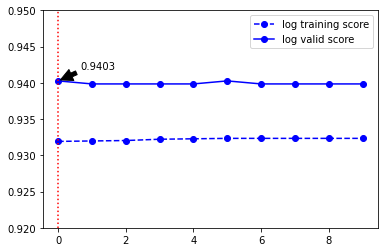

In [38]:
import matplotlib.pyplot as plt
train_log_scores=[]
test_log_scores=[]
for c in range(1,11,1):
    log_ = LogisticRegression(C=0.1*c, penalty='l1', solver='liblinear', random_state=3612)
    log_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
    train_log_scores.append(log_.score(X_train_nozero, y_train_t1_value))
    test_log_scores.append(log_.score(X_valid_nozero, y_valid_t1_value))
plt.plot(train_log_scores, 'bo--')
plt.plot(test_log_scores, 'bo-')
plt.ylim(0.92, 0.95)
plt.legend(["log training score", "log valid score"])
plt.axvline(np.argmax(test_log_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_log_scores).round(4), (np.argmax(test_log_scores), np.max(test_log_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

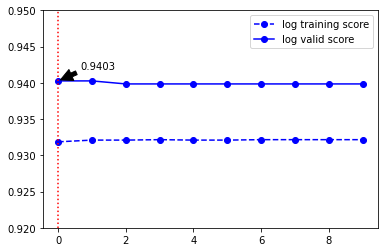

In [39]:
train_log_scores=[]
test_log_scores=[]
for c in range(1,11,1):
    log_ = LogisticRegression(C=0.1*c, penalty='l1', solver='saga', random_state=3612)
    log_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
    train_log_scores.append(log_.score(X_train_nozero, y_train_t1_value))
    test_log_scores.append(log_.score(X_valid_nozero, y_valid_t1_value))
plt.plot(train_log_scores, 'bo--')
plt.plot(test_log_scores, 'bo-')
plt.ylim(0.92, 0.95)
plt.legend(["log training score", "log valid score"])
plt.axvline(np.argmax(test_log_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_log_scores).round(4), (np.argmax(test_log_scores), np.max(test_log_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [40]:
scaler = StandardScaler()
scaler.fit(X_train_nozero)
log_=LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=3612)
sel_ = SelectFromModel(log_)
sel_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
X_train_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_train_nozero)))
X_valid_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_valid_nozero)))
X_test_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_test_nozero)))
cols=sel_.get_support(indices=True)
headnozero_new=[]
for i in cols:
    headnozero_new.append(headnozero[i])
X_train_selected_t1.columns=headnozero_new
X_valid_selected_t1.columns=headnozero_new
X_test_selected_t1.columns=headnozero_new
X_train_selected_t1

,alanine aminotransferase,albumin,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bilirubin,blood urea nitrogen,calcium ionized,central venous pressure,...,respiratory rate,respiratory rate set,sodium,systolic blood pressure,temperature,tidal volume observed,tidal volume set,troponin-t,weight,white blood cell count
0,-0.288458,-3.306524e+00,-0.448675,0.480040,-0.220009,0.000000,-3.233569e-01,0.936056,-5.598335e-02,-2.578786e-01,...,-0.192388,4.819271e-01,0.064360,-0.867032,0.884117,5.371056e-01,6.239997e-01,4.104534e-17,1.244821,0.790869
1,-0.293777,-4.706776e-01,-0.635565,1.973117,-0.292865,-1.171347,-5.765104e-01,2.121048,-1.148847e-17,-3.528614e-01,...,-1.089607,-1.480117e-17,-1.068142,0.309697,-0.102469,3.751961e-17,-8.842220e-18,4.104534e-17,0.000000,-0.173856
2,-0.325687,1.138720e-17,-0.535891,-0.117191,-0.338660,3.287565,-4.921259e-01,-0.351978,-5.378030e-02,-4.857918e-18,...,-0.910163,-2.218059e-02,-0.615141,2.663156,0.822486,1.703934e+00,1.692524e+00,4.104534e-17,0.000000,0.190857
3,0.000000,1.138720e-17,0.000000,0.181425,0.000000,0.000000,2.398447e-17,-0.248935,-1.148847e-17,-4.857918e-18,...,-0.192388,-1.480117e-17,0.743862,-0.537548,-0.719132,3.751961e-17,-8.842220e-18,4.104534e-17,0.000000,0.084973
4,0.000000,1.138720e-17,0.000000,-0.714421,0.000000,0.000000,2.398447e-17,0.781492,-6.920168e-02,-2.578786e-01,...,-0.551276,2.298733e-01,1.423363,1.015735,0.514121,5.954471e-01,6.239997e-01,-5.419998e-01,0.000000,-0.503274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,0.000000,1.656207e+00,0.000000,-0.714421,0.000000,0.450076,2.398447e-17,-0.094371,-1.148847e-17,-4.857918e-18,...,-0.910163,-1.480117e-17,-0.162140,0.215559,-2.337736,3.751961e-17,-8.842220e-18,-6.385765e-01,0.705365,-0.150326
16756,0.000000,1.138720e-17,0.000000,0.181425,0.000000,-1.171347,2.398447e-17,-0.300456,-1.148847e-17,-4.857918e-18,...,0.345944,-1.480117e-17,0.290861,0.827458,0.051678,3.751961e-17,-8.842220e-18,-6.297968e-01,1.180862,0.567335
16757,-0.304413,1.656207e+00,-0.411297,-0.117191,-0.311599,0.000000,-7.020351e-02,0.214757,-3.174975e-02,1.071881e+00,...,-0.012944,-1.480117e-17,-0.841642,-0.914101,-0.950335,3.751961e-17,-8.842220e-18,4.104534e-17,-0.588114,-0.550334
16758,0.000000,1.138720e-17,0.000000,-1.013036,0.000000,0.000000,2.398447e-17,-0.300456,-1.148847e-17,-6.791287e-02,...,-0.012944,-1.480117e-17,1.649864,1.721773,0.437067,3.751961e-17,-8.842220e-18,4.104534e-17,0.945474,-0.562099


### task2

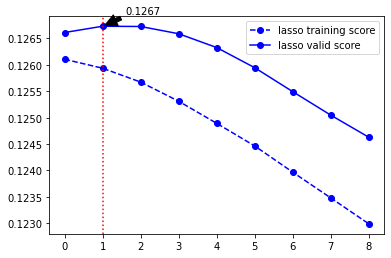

In [41]:
train_lasso_scores=[]
test_lasso_scores=[]
from sklearn import linear_model
for a in range(1,10,1):
    lasso = linear_model.Lasso(alpha=0.001*a)
    lasso.fit(X_train_nozero, y_train_t2_value)
    train_lasso_scores.append(lasso.score(X_train_nozero, y_train_t2_value))
    test_lasso_scores.append(lasso.score(X_valid_nozero, y_valid_t2_value))

plt.plot(train_lasso_scores, 'bo--')
plt.plot(test_lasso_scores, 'bo-')

plt.legend(["lasso training score", "lasso valid score"])
plt.axvline(np.argmax(test_lasso_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_lasso_scores).round(4), (np.argmax(test_lasso_scores), np.max(test_lasso_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [42]:
y_train_t2_value

0        6.064560
1        3.672917
2        5.323056
3        1.584410
4        7.634815
           ...   
16755    1.703391
16756    2.731933
16757    7.949259
16758    3.142616
16759    2.161481
Name: los_icu, Length: 16760, dtype: float64

In [43]:
lasso = linear_model.Lasso(alpha=0.002)
sel2_ = SelectFromModel(lasso)
sel2_.fit(scaler.transform(X_train_nozero), y_train_t2_value)
X_train_selected_t2 = pd.DataFrame(sel2_.transform(scaler.transform(X_train_nozero)))
X_valid_selected_t2 = pd.DataFrame(sel2_.transform(scaler.transform(X_valid_nozero)))
X_test_selected_t2 = pd.DataFrame(sel2_.transform(scaler.transform(X_test_nozero)))
cols=sel2_.get_support(indices=True)
headnozero_new2=[]
for i in cols:
    headnozero_new2.append(headnozero[i])
X_train_selected_t2.columns=headnozero_new2
X_valid_selected_t2.columns=headnozero_new2
X_test_selected_t2.columns=headnozero_new2
X_train_selected_t2

,albumin,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,bilirubin,blood urea nitrogen,calcium,calcium ionized,...,respiratory rate,respiratory rate set,systolic blood pressure,temperature,tidal volume observed,tidal volume set,tidal volume spontaneous,troponin-t,weight,white blood cell count
0,-3.306524e+00,-0.448675,0.480040,-0.220009,0.000000,-1.643837,-3.233569e-01,0.936056,-1.378320,-5.598335e-02,...,-0.192388,4.819271e-01,-0.867032,0.884117,5.371056e-01,6.239997e-01,0.000000,4.104534e-17,1.244821,0.790869
1,-4.706776e-01,-0.635565,1.973117,-0.292865,-1.171347,-1.405521,-5.765104e-01,2.121048,-0.351525,-1.148847e-17,...,-1.089607,-1.480117e-17,0.309697,-0.102469,3.751961e-17,-8.842220e-18,0.000000,4.104534e-17,0.000000,-0.173856
2,1.138720e-17,-0.535891,-0.117191,-0.338660,3.287565,0.501009,-4.921259e-01,-0.351978,0.760836,-5.378030e-02,...,-0.910163,-2.218059e-02,2.663156,0.822486,1.703934e+00,1.692524e+00,0.000000,4.104534e-17,0.000000,0.190857
3,1.138720e-17,0.000000,0.181425,0.000000,0.000000,0.501009,2.398447e-17,-0.248935,1.103101,-1.148847e-17,...,-0.192388,-1.480117e-17,-0.537548,-0.719132,3.751961e-17,-8.842220e-18,0.000000,4.104534e-17,0.000000,0.084973
4,1.138720e-17,0.000000,-0.714421,0.000000,0.000000,0.262693,2.398447e-17,0.781492,0.504137,-6.920168e-02,...,-0.551276,2.298733e-01,1.015735,0.514121,5.954471e-01,6.239997e-01,-2.302771,-5.419998e-01,0.000000,-0.503274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,1.656207e+00,0.000000,-0.714421,0.000000,0.450076,0.262693,2.398447e-17,-0.094371,0.418571,-1.148847e-17,...,-0.910163,-1.480117e-17,0.215559,-2.337736,3.751961e-17,-8.842220e-18,0.000000,-6.385765e-01,0.705365,-0.150326
16756,1.138720e-17,0.000000,0.181425,0.000000,-1.171347,-2.835418,2.398447e-17,-0.300456,-0.779356,-1.148847e-17,...,0.345944,-1.480117e-17,0.827458,0.051678,3.751961e-17,-8.842220e-18,0.000000,-6.297968e-01,1.180862,0.567335
16757,1.656207e+00,-0.411297,-0.117191,-0.311599,0.000000,1.454274,-7.020351e-02,0.214757,0.418571,-3.174975e-02,...,-0.012944,-1.480117e-17,-0.914101,-0.950335,3.751961e-17,-8.842220e-18,0.000000,4.104534e-17,-0.588114,-0.550334
16758,1.138720e-17,0.000000,-1.013036,0.000000,0.000000,0.501009,2.398447e-17,-0.300456,-0.608224,-1.148847e-17,...,-0.012944,-1.480117e-17,1.721773,0.437067,3.751961e-17,-8.842220e-18,0.000000,4.104534e-17,0.945474,-0.562099


## Normalization

In [44]:
scaler = preprocessing.StandardScaler()

X_train_selected_t1=X_train_selected_t1.values
X_train_selected_t1_scaled = scaler.fit_transform(X_train_selected_t1)
X_train_selected_t1_norm=pd.DataFrame(X_train_selected_t1_scaled)

X_train_selected_t2=X_train_selected_t2.values
X_train_selected_t2_scaled = scaler.fit_transform(X_train_selected_t2)
X_train_selected_t2_norm=pd.DataFrame(X_train_selected_t2_scaled)

X_valid_selected_t1=X_valid_selected_t1.values
X_valid_selected_t1_scaled = scaler.fit_transform(X_valid_selected_t1)
X_valid_selected_t1_norm=pd.DataFrame(X_valid_selected_t1_scaled)

X_valid_selected_t2=X_valid_selected_t2.values
X_valid_selected_t2_scaled = scaler.fit_transform(X_valid_selected_t2)
X_valid_selected_t2_norm=pd.DataFrame(X_valid_selected_t2_scaled)

X_test_selected_t1=X_test_selected_t1.values
X_test_selected_t1_scaled = scaler.fit_transform(X_test_selected_t1)
X_test_selected_t1_norm=pd.DataFrame(X_test_selected_t1_scaled)

X_test_selected_t2=X_test_selected_t2.values
X_test_selected_t2_scaled = scaler.fit_transform(X_test_selected_t2)
X_test_selected_t2_norm=pd.DataFrame(X_test_selected_t2_scaled)


# Data report

In [45]:
print("*"*60)
print("There are 6 set of X")
print("X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2")
print("-"*60)
print("Normalized version")
print("X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm")
print("-"*60)
print("There are 4 set of Y")
print("y_train_t1, y_train_t2, y_valid_t1, y_valid_t2")
print("when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'")
print("*"*60)

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************
